In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [ ]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

In [ ]:
f(0)

1

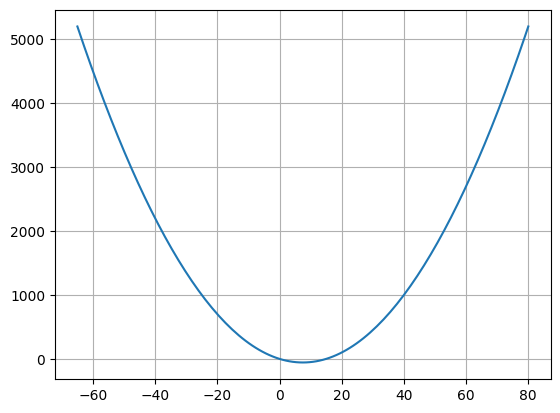

In [ ]:
x = np.linspace(-65 , 80 , 135)
zero_d = f(x)

plt.plot(x , zero_d)
plt.grid()
plt.show()

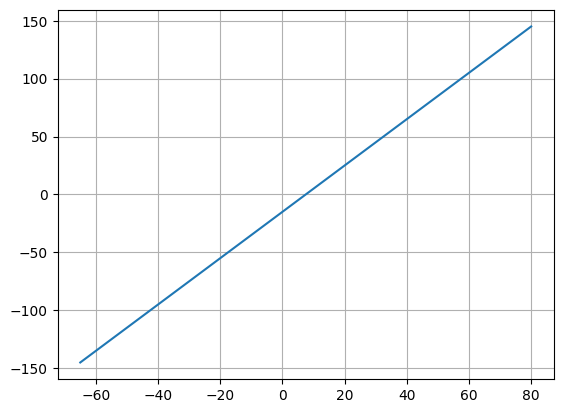

In [ ]:
x = np.linspace(-65 , 80 , 135)
first_d = Df(x)

plt.plot(x , first_d)
plt.grid()
plt.show()

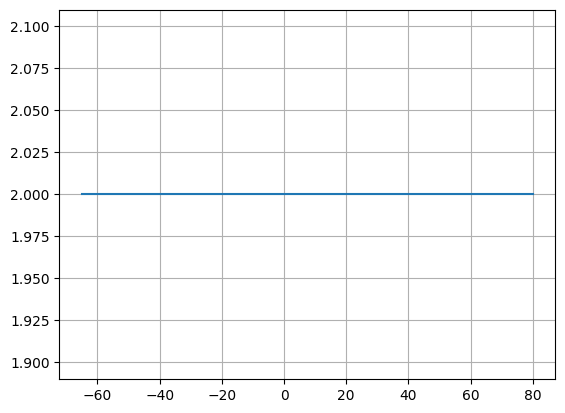

In [ ]:
x = np.linspace(-65 , 80 , 135)
second_d = np.full((135 , ), 2)

plt.plot(x , second_d)
plt.grid()
plt.show()

In [ ]:
def GD_single_var(x0 , alpha ,epsilon,  max_iteration):

  for i in range(max_iteration):
    gradiant = Df(x0)

    if gradiant < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break

    x0 = x0 - alpha * gradiant



In [ ]:
GD_single_var(40 , 0.01 ,0.1,  500)

----------Found solution after 321 iterations. -----------
X_min :  7.549596800192111
Gradiant :  0.09919360038422198


In [ ]:
def Newton_method(x0 , alpha ,epsilon,  max_iteration):

  for i in range(max_iteration):
    gradiant = Df(x0)
    if gradiant < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break

    x0 = x0 - alpha * (gradiant / DDf(x0))

In [ ]:
Newton_method(40 , 1 ,0.1,  500)

----------Found solution after 1 iterations. -----------
X_min :  7.5
Gradiant :  0.0


In [ ]:
Newton_method(40 , 0.8 ,0.1,  500)

----------Found solution after 5 iterations. -----------
X_min :  7.5104
Gradiant :  0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [ ]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

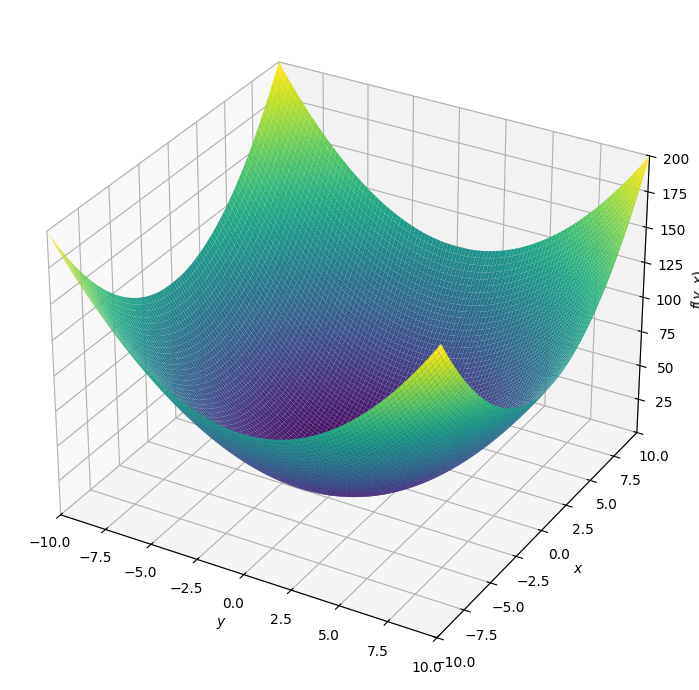

In [ ]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

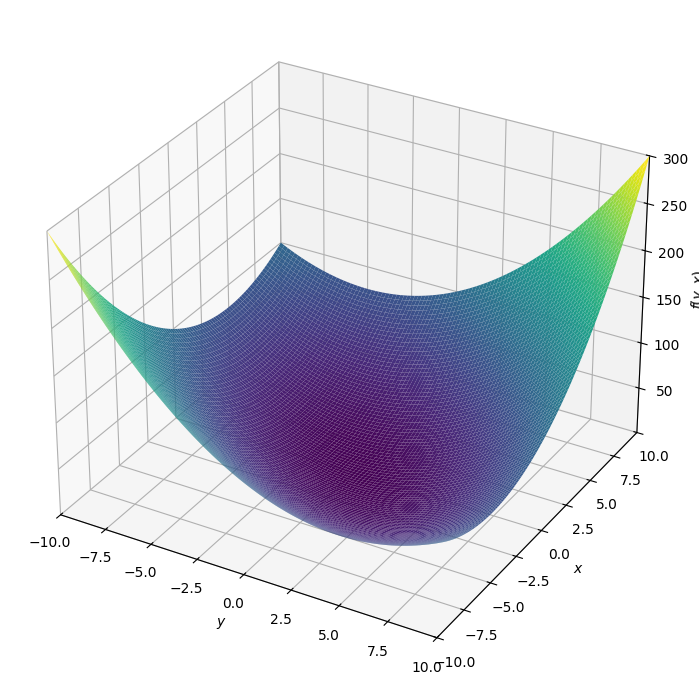

In [ ]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$

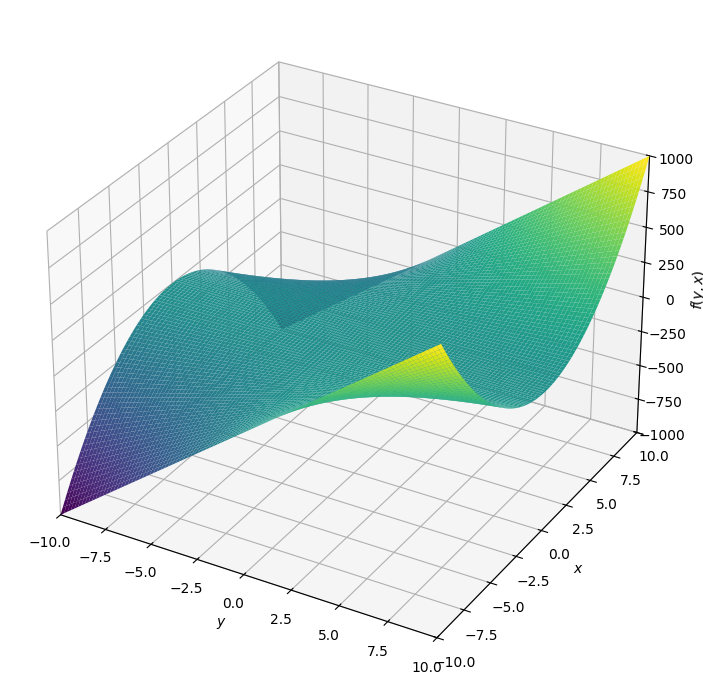

In [ ]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [ ]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [ ]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [ ]:
def GD_multi_var(x0 , alpha ,epsilon,  max_iteration):

  x0 = np.array(x0)

  for i in range(max_iteration):
    gradiant = Df_1(x0)
    gradiant_norm = np.linalg.norm(gradiant)

    if gradiant_norm < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break

    x0 = x0 - alpha * gradiant

In [ ]:
GD_multi_var((10 ,10) , 0.5 ,0.001,  500)

----------Found solution after 1 iterations. -----------
X_min :  [0. 0.]
Gradiant :  [0. 0.]


In [ ]:
GD_multi_var((10 ,10), 0.1 ,0.001,  500)

----------Found solution after 46 iterations. -----------
X_min :  [0.00034845 0.00034845]
Gradiant :  [0.0006969 0.0006969]


In [ ]:
def Newton_multi_method(x0 , alpha ,epsilon,  max_iteration):

  x0 = np.array(x0)

  for i in range(max_iteration):

    gradiant = Df_1(x0)
    gradiant_norm = np.linalg.norm(gradiant)

    if gradiant_norm < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break

    H_inv = np.linalg.inv(DDf_1(x0))
    x0 = x0 - alpha * (gradiant @ H_inv)


In [ ]:
Newton_method((10,10) , 1 ,0.001,  100)

----------Found solution after 1 iterations. -----------
X_min :  [0. 0.]
Gradiant :  [0. 0.]


In [ ]:
Newton_method((10,10) , 0.5 ,0.001,  100)

----------Found solution after 15 iterations. -----------
X_min :  [0.00030518 0.00030518]
Gradiant :  [0.00061035 0.00061035]


In [ ]:
def GD_multi_var(x0 , alpha ,epsilon,  max_iteration):

  x0 = np.array(x0)

  for i in range(max_iteration):
    gradiant = Df_2(x0)
    gradiant_norm = np.linalg.norm(gradiant)

    if gradiant_norm < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break
    x0 = x0 - alpha * gradiant

In [ ]:
GD_multi_var((10,10) , 0.5 ,0.001,  100)

----------Found solution after 16 iterations. -----------
X_min :  [0.00015259 0.00015259]
Gradiant :  [0.00045776 0.00045776]


In [ ]:
def Newton_multi_method(x0 , alpha ,epsilon,  max_iteration):

  x0 = np.array(x0)
  for i in range(max_iteration):

    gradiant = Df_2(x0)
    gradiant_norm = np.linalg.norm(gradiant)

    if gradiant_norm < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break

    H_inv = np.linalg.inv(DDf_2(x0))
    x0 = x0 - alpha * (gradiant @ H_inv)


In [ ]:
Newton_multi_method((10 , 10) , 1 ,0.001,  500)

----------Found solution after 1 iterations. -----------
X_min :  [0. 0.]
Gradiant :  [0. 0.]


In [ ]:
Newton_multi_method((10 , 10) , 0.9 ,0.001,  500)

----------Found solution after 5 iterations. -----------
X_min :  [1.e-04 1.e-04]
Gradiant :  [0.0003 0.0003]


In [ ]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [ ]:
DDf_5((10,10))

array([[20, 20],
       [20,  0]])

In [ ]:
def GD_multi_var(x0 , alpha ,epsilon,  max_iteration):

  x0 = np.array(x0)

  for i in range(max_iteration):
    gradiant = Df_5(x0)
    gradiant_norm = np.linalg.norm(gradiant)

    if gradiant_norm < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break
    x0 = x0 - alpha * gradiant

In [ ]:
GD_multi_var((10,10) , 0.01 ,0.001,  500)

----------Found solution after 79 iterations. -----------
X_min :  [6.80598421e-05 6.85061189e+00]
Gradiant :  [9.32503127e-04 4.63214210e-09]


In [ ]:
def Newton_multi_method(x0 , alpha ,epsilon,  max_iteration):

  x0 = np.array(x0)
  for i in range(max_iteration):

    gradiant = Df_5(x0)
    gradiant_norm = np.linalg.norm(gradiant)

    if gradiant_norm < epsilon:
      print(f'----------Found solution after {i} iterations. -----------')
      print("X_min : " , x0)
      print("Gradiant : ", gradiant)
      break
    H_inv = np.linalg.pinv(DDf_5(x0))
    x0 = x0 - alpha * (gradiant @ H_inv)



In [ ]:
Newton_multi_method((10,10) , 1 ,0.001,  500)

----------Found solution after 9 iterations. -----------
X_min :  [0.01953125 0.01953125]
Gradiant :  [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [2]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [3]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [4]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [34]:
def BFGD(x_k_prev , x_k , epsilon , max_iteration , alpha =1 ):

  x_k_prev = np.array(x_k_prev).reshape(-1, 1)
  x_k = np.array(x_k).reshape(-1, 1)
  B_0 = np.identity(len(x_k))
  I = np.identity(len(B_0))
  gradiant_prev = Df_1(x_k_prev).reshape(-1, 1)


  for i in range(max_iteration):
    print (f'---------------------------------------------------')
    print()
    print("xn-1 :" , x_k_prev)
    print("xn :" ,x_k)

    #gradiant_prev = Df_1(x_k_prev)
    print("Dfxn-1 : " , gradiant_prev)
    gradiant_current = Df_1(x_k).reshape(-1 , 1)
    print("Dfxn : " , gradiant_current)

    y_t = gradiant_current - gradiant_prev
    grad_norm = np.linalg.norm(gradiant_current)
    print(grad_norm)

    x_t = x_k - x_k_prev
    part_1 = np.outer(x_t, y_t) / (y_t.T @ x_t)
    part_2 = np.outer(y_t, x_t) / (y_t.T @ x_t)
    part_3 = np.outer(x_t, x_t) / (y_t.T @ x_t)

    B_0 = (I - part_1) @ B_0 @(I - part_2) + part_3


    if (grad_norm) < epsilon:
      print(f"Converged at iteration {i}!")
      print("gradiant :" , gradiant_current)
      print("xn-1 :" , x_k_prev)
      print("xn :" ,x_k)

      break


    print(B_0)
    x_k_prev = x_k.copy()
    gradiant_prev = gradiant_current.copy()
    x_k  = x_k - alpha * (B_0 @ gradiant_current)




In [35]:
BFGD((10,10) , (9,9) , 0.001 , 500)

---------------------------------------------------

xn-1 : [[10]
 [10]]
xn : [[9]
 [9]]
Dfxn-1 :  [[20]
 [20]]
Dfxn :  [[18]
 [18]]
25.45584412271571
[[ 0.75 -0.25]
 [-0.25  0.75]]
---------------------------------------------------

xn-1 : [[9]
 [9]]
xn : [[0.]
 [0.]]
Dfxn-1 :  [[18]
 [18]]
Dfxn :  [[0.]
 [0.]]
0.0
Converged at iteration 1!
gradiant : [[0.]
 [0.]]
xn-1 : [[9]
 [9]]
xn : [[0.]
 [0.]]


In [36]:
BFGD((10,10) , (9,9) , 0.001 , 500 , 0.9)

---------------------------------------------------

xn-1 : [[10]
 [10]]
xn : [[9]
 [9]]
Dfxn-1 :  [[20]
 [20]]
Dfxn :  [[18]
 [18]]
25.45584412271571
[[ 0.75 -0.25]
 [-0.25  0.75]]
---------------------------------------------------

xn-1 : [[9]
 [9]]
xn : [[0.9]
 [0.9]]
Dfxn-1 :  [[18]
 [18]]
Dfxn :  [[1.8]
 [1.8]]
2.545584412271572
[[ 0.75 -0.25]
 [-0.25  0.75]]
---------------------------------------------------

xn-1 : [[0.9]
 [0.9]]
xn : [[0.09]
 [0.09]]
Dfxn-1 :  [[1.8]
 [1.8]]
Dfxn :  [[0.18]
 [0.18]]
0.25455844122715704
[[ 0.75 -0.25]
 [-0.25  0.75]]
---------------------------------------------------

xn-1 : [[0.09]
 [0.09]]
xn : [[0.009]
 [0.009]]
Dfxn-1 :  [[0.18]
 [0.18]]
Dfxn :  [[0.018]
 [0.018]]
0.025455844122715694
[[ 0.75 -0.25]
 [-0.25  0.75]]
---------------------------------------------------

xn-1 : [[0.009]
 [0.009]]
xn : [[0.0009]
 [0.0009]]
Dfxn-1 :  [[0.018]
 [0.018]]
Dfxn :  [[0.0018]
 [0.0018]]
0.0025455844122715702
[[ 0.75 -0.25]
 [-0.25  0.75]]
-----------

In [43]:
def BFGD(x_k_prev , x_k , epsilon , max_iteration , alpha =1 ):

  x_k_prev = np.array(x_k_prev).reshape(-1, 1)
  x_k = np.array(x_k).reshape(-1, 1)
  B_0 = np.identity(len(x_k))
  I = np.identity(len(B_0))
  gradiant_prev = Df_2(x_k_prev).reshape(-1, 1)


  for i in range(max_iteration):
    print (f'---------------------------------------------------')
    print()
    print("xn-1 :" , x_k_prev)
    print("xn :" ,x_k)

    #gradiant_prev = Df_1(x_k_prev)
    print("Dfxn-1 : " , gradiant_prev)
    gradiant_current = Df_2(x_k).reshape(-1 , 1)
    print("Dfxn : " , gradiant_current)

    y_t = gradiant_current - gradiant_prev
    grad_norm = np.linalg.norm(gradiant_current)
    print(grad_norm)
    x_t = x_k - x_k_prev


    part_1 = np.outer(x_t, y_t) / (y_t.T @ x_t)
    part_2 = np.outer(y_t, x_t) / (y_t.T @ x_t)
    part_3 = np.outer(x_t, x_t) / (y_t.T @ x_t)

    B_0 = (I - part_1) @ B_0 @(I - part_2) + part_3


    if (grad_norm) < epsilon:
      print(f"Converged at iteration {i}!")
      print("gradiant :" , gradiant_current)
      print("xn-1 :" , x_k_prev)
      print("xn :" ,x_k)

      break

    print(B_0)
    gradiant_prev = gradiant_current.copy()
    x_k_prev = x_k.copy()
    x_k  = x_k - alpha * (B_0 @ gradiant_current)

In [44]:
BFGD((10,10) , (9,9) , 0.001 , 500 )

---------------------------------------------------

xn-1 : [[10]
 [10]]
xn : [[9]
 [9]]
Dfxn-1 :  [[30]
 [30]]
Dfxn :  [[27]
 [27]]
38.18376618407357
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
---------------------------------------------------

xn-1 : [[9]
 [9]]
xn : [[3.55271368e-15]
 [1.77635684e-15]]
Dfxn-1 :  [[27]
 [27]]
Dfxn :  [[8.88178420e-15]
 [7.10542736e-15]]
1.1374233532693354e-14
Converged at iteration 1!
gradiant : [[8.88178420e-15]
 [7.10542736e-15]]
xn-1 : [[9]
 [9]]
xn : [[3.55271368e-15]
 [1.77635684e-15]]


In [45]:
BFGD((10,10) , (9,9) , 0.001 , 500 , 0.9)

---------------------------------------------------

xn-1 : [[10]
 [10]]
xn : [[9]
 [9]]
Dfxn-1 :  [[30]
 [30]]
Dfxn :  [[27]
 [27]]
38.18376618407357
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
---------------------------------------------------

xn-1 : [[9]
 [9]]
xn : [[0.9]
 [0.9]]
Dfxn-1 :  [[27]
 [27]]
Dfxn :  [[2.7]
 [2.7]]
3.8183766184073655
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
---------------------------------------------------

xn-1 : [[0.9]
 [0.9]]
xn : [[0.09]
 [0.09]]
Dfxn-1 :  [[2.7]
 [2.7]]
Dfxn :  [[0.27]
 [0.27]]
0.38183766184073553
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
---------------------------------------------------

xn-1 : [[0.09]
 [0.09]]
xn : [[0.009]
 [0.009]]
Dfxn-1 :  [[0.27]
 [0.27]]
Dfxn :  [[0.027]
 [0.027]]
0.03818376618407363
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
---------------------------------------------------

xn-1 : [[0.009]
 [0.009]]
xn : [[0.0009]
 [0.0009]]
Dfxn-1 :  [[0.027]
 [0.027

In [46]:
def BFGD(x_k_prev , x_k , epsilon , max_iteration , alpha =1 ):

  x_k_prev = np.array(x_k_prev).reshape(-1, 1)
  x_k = np.array(x_k).reshape(-1, 1)
  B_0 = np.identity(len(x_k))
  I = np.identity(len(B_0))
  gradiant_prev = Df_5(x_k_prev).reshape(-1, 1)


  for i in range(max_iteration):
    print (f'---------------------------------------------------')
    print()
    print("xn-1 :" , x_k_prev)
    print("xn :" ,x_k)

    #gradiant_prev = Df_1(x_k_prev)
    print("Dfxn-1 : " , gradiant_prev)
    gradiant_current = Df_5(x_k).reshape(-1 , 1)
    print("Dfxn : " , gradiant_current)

    y_t = gradiant_current - gradiant_prev
    grad_norm = np.linalg.norm(gradiant_current)
    x_t = x_k - x_k_prev

    if (grad_norm) < epsilon:
      print(f"Converged at iteration {i}!")
      print("gradiant :" , gradiant_current)
      print("xn-1 :" , x_k_prev)
      print("xn :" ,x_k)

      break

    part_1 = np.outer(x_t, y_t) / (y_t.T @ x_t)
    part_2 = np.outer(y_t, x_t) / (y_t.T @ x_t)
    part_3 = np.outer(x_t, x_t) / (y_t.T @ x_t)

    B_0 = (I - part_1) @ B_0 @(I - part_2) + part_3
    print(B_0)
    gradiant_prev = gradiant_current.copy()
    x_k_prev = x_k.copy()
    x_k  = x_k - alpha * (B_0 @ gradiant_current)




In [47]:
BFGD((10,10) , (9,9) , 0.001 , 500 )

---------------------------------------------------

xn-1 : [[10]
 [10]]
xn : [[9]
 [9]]
Dfxn-1 :  [[200]
 [100]]
Dfxn :  [[162]
 [ 81]]
[[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
---------------------------------------------------

xn-1 : [[9]
 [9]]
xn : [[4.73684211]
 [4.73684211]]
Dfxn-1 :  [[162]
 [ 81]]
Dfxn :  [[44.87534626]
 [22.43767313]]
[[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
---------------------------------------------------

xn-1 : [[4.73684211]
 [4.73684211]]
xn : [[3.10344828]
 [3.10344828]]
Dfxn-1 :  [[44.87534626]
 [22.43767313]]
Dfxn :  [[19.2627824]
 [ 9.6313912]]
[[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
---------------------------------------------------

xn-1 : [[3.10344828]
 [3.10344828]]
xn : [[1.875]
 [1.875]]
Dfxn-1 :  [[19.2627824]
 [ 9.6313912]]
Dfxn :  [[7.03125 ]
 [3.515625]]
[[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
---------------------------------------------------

xn-1 : [[1.875]
 [1.875]]
xn : [[1.